# Part 1: Exploring the friendship paradox. 

This first part draws on the friendship paradox exercise from Week 3. You should provide solutions to the following exercises from **Part 3** of that week.

* *The friendship paradox in BA networks*
* *The friendship paradox more generally*
* *The friendship paradox and the configuration model*
* *Growth without preferential attachment*


### *The friendship paradox in BA networks*

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

# set a random seed
random.seed(6)
np.random.seed(6)

> * Compare the two numbers to check if it's true that $i$'s friends (on average) have more friends than $i$.

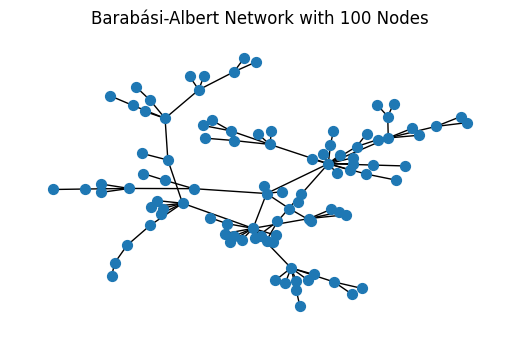

Maximum degree: 127
Minimum degree: 1


In [2]:
# Create a graph
BA = nx.Graph()

# Create a single link
BA.add_edge(0, 1)

# Function to add a node with preferential attachment
def add_node_with_preferential_attachment(G):
    # Create a list of nodes where nodes appear proportional to their degree
    nodes = list(G.nodes)
    node_list = []
    for node in nodes:
        # Append each node by the number of times equal to its degree
        node_list.extend([node] * G.degree[node])

    # Randomly choose a node to connect to from this list (preferential attachment)
    
    new_node = len(G.nodes)
    connected_node = random.choice(node_list)
    G.add_edge(new_node, connected_node)

# Add 100 nodes with preferential attachment
while len(BA.nodes) < 100:
    add_node_with_preferential_attachment(BA)

# Plot the network after 100 nodes with reduced figure size
plt.figure(figsize=(5, 3))
nx.draw(BA, node_size=50, with_labels=False)
plt.title("Barabási-Albert Network with 100 Nodes")
plt.show()

# Add till 5000 nodes
while len(BA.nodes) < 5000:
    add_node_with_preferential_attachment(BA)

# Find the maximum and minimum degree
degrees = dict(BA.deself.graphree()).values()
max_degree = max(degrees)
min_degree = min(degrees)
print(f"Maximum degree: {max_degree}")
print(f"Minimum degree: {min_degree}")


> * Do this 1000 times. How many out of those 1000 times is the friendship paradox true in **F-BA**?

In [3]:
count = 0

for j in range(1000):
    # Get a random node from BA
    i = random.choice(list(BA.nodes))

    # Get the node degree
    degree = BA.degree[i]

    # Get the neighbors of the node
    neighbors = list(BA.neighbors(i))

    # Calculate average degree of the neighbors
    avg_degree = np.mean([BA.degree[n] for n in neighbors])

    if degree < avg_degree:
        count += 1

# Print F-BA paradox count
print(f"Number of times the F-BA paradox occurs: {count}")

Number of times the F-BA paradox occurs: 850


### *The friendship paradox more generally*

> * What if the power law is flatter, e.g. $p(k) \sim k^{-\gamma}$ with $\gamma = 2$? Will the fraction of times the paradox is true be higher or lower?

When  $\gamma$  = 2, the power-law distribution is flatter, which means the friendship paradox will be more prevalent because high-degree nodes (hubs) are more common; hence, more likely to be selected as friends. Conversely, as $\gamma$ increases, the paradox becomes less prevalent because the distribution favors low-degree nodes.

> - Did you reason correctly above? For what fraction of the time is the friendship paradox true for your network with a new slope?

In [4]:
# Parameters for power-law distribution
alpha = 2  # Power-law exponent
x_min = 1   # Minimum degree
num_nodes = 5000  # Number of nodes

# Generate a power-law degree sequence
def generate_power_law_sequence(alpha, x_min, size):
    # Generate uniformly distributed random numbers
    r = np.random.uniform(0, 1, size)
    # Transform to get power-law distributed degrees
    degrees = x_min * (1 - r) ** (-1 / (alpha - 1))
    # Round to integers
    degrees = np.round(degrees).astype(int)
    return degrees

# Generate degree sequence
degree_sequence = generate_power_law_sequence(alpha, x_min, num_nodes)

# Ensure the sum of the degree sequence is even
if np.sum(degree_sequence) % 2 != 0:
    # If sum is odd, add 1 to a random degree to make it even
    degree_sequence[np.random.randint(0, num_nodes)] += 1

# Create the network using the configuration model
BAF = nx.configuration_model(degree_sequence)

# Remove self-loops and parallel edges
BAF = nx.Graph(BAF)  # Convert to simple graph
BAF.remove_edges_from(nx.selfloop_edges(BAF))

In [11]:

count = 0

for j in range(1000):
    # Get a random node from BA
    i = random.choice(list(BAF.nodes))

    # Get the node degree
    degree = BAF.degree[i]

    # Get the neighbors of the node
    neighbors = list(BAF.neighbors(i))

    # Calculate average degree of the neighbors
    avg_degree = np.mean([BAF.degree[n] for n in neighbors])

    if degree < avg_degree:
        count += 1

# Print F-BA paradox count
print(f"Number of times the F-BA flatter paradox occurs: {count}")

Number of times the F-BA flatter paradox occurs: 986


The previous reasoning is suported by the results, the original F-BA paradox occurs around 85% of the times, compared with the flatter F-BA paradox that has a prevalence of 97%.

###  *The friendship paradox and the configuration model*

> - Now generate a network for the configuration model that has *the same slope and number of nodes as **F-BA** in A above*; let's call this new network **F-CM** (for *friendship configuration model*). 
>    - What fraction of the time is the friendship paradox is true for the **F-CM** network?

In [6]:
# Doing the F-CM friendship configuration model
# Degree sequence of the BA network
degree_sequence = [d for n, d in BA.degree()]

# Generate the configuration model based on the degree sequence
FCM = nx.configuration_model(degree_sequence)
FCM = nx.Graph(FCM)  # Convert to simple graph (removes parallel edges and self-loops)

count = 0

for j in range(1000):
    # Get a random node from BA
    
    i = random.choice(list(FCM.nodes))

    # Get the node degree
    degree = FCM.degree[i]

    # Get the neighbors of the node
    neighbors = list(FCM.neighbors(i))

    # Calculate average degree of the neighbors
    avg_degree = np.mean([FCM.degree[n] for n in neighbors])

    if degree < avg_degree:
        count += 1

# Print F-CM paradox count
print(f"Number of times the F-CM paradox occurs: {count}")

Number of times the F-CM paradox occurs: 618


>    - Assuming that **F-BA** and **F-CM** have the same degree sequence can now *think* about if **F-BA** and **F-CM** are different with respect to the friendship paradox. Specifically, please explain your thoughts on the following topics
>       * Are there factors beyond the degree-distribution that could impact how frequently the friendship paradox is true? I might consider how network properties like assortativity, clustering, community-structure, etc potentially could impact things (it's OK to search online and add references to your answer).
>       * How would you test more rigorously if the friendship-paradox is actually true equally often in **F-BA** and **F-CM**? (E.g. how would you run a statistical test to investigate ... or how would you put error-bars on your plots?)

While degree distribution is crucial in determining how frequently the friendship paradox holds, several other network properties can influence the outcome. Below are key factors:

* **Assortativity (Degree Correlation)**

**Definition**: Assortativity is a measure of how nodes with similar degrees tend to connect. In assortative networks, high-degree nodes are more likely to connect to other high-degree nodes, whereas in disassortative networks, high-degree nodes connect more frequently to low-degree nodes.

**Impact on Friendship Paradox**: The friendship paradox is more likely to occur in disassortative networks because high-degree nodes tend to have low-degree neighbors, causing most nodes to see higher average neighbor degrees. In assortative networks, nodes of similar degrees cluster, reducing the likelihood of the paradox. Therefore, F-BA and F-CM might differ in assortativity, potentially affecting how often the paradox holds.

* **Clustering Coefficient (Triadic Closure)**

**Definition**: The clustering coefficient measures the degree to which nodes in a network tend to form closed triplets or triangles (i.e., if two neighbors of a node are also neighbors of each other).

**Impact on Friendship Paradox**: Networks with high clustering tend to have tightly-knit communities where node degrees are more similar, reducing the friendship paradox's effect. Barabási-Albert (BA) networks typically exhibit low clustering because of their tree-like, hub-and-spoke structure, while configuration models can exhibit more diverse clustering patterns. If F-BA and F-CM differ significantly in clustering, it could lead to variations in how frequently the paradox is observed.

* **Community Structure**

**Definition**: Community structure refers to how nodes are grouped into distinct clusters or subgroups, with more connections within groups than between them.

**Impact on Friendship Paradox:** Networks with pronounced community structures can have localized effects on degree distribution and neighbor degrees. In a network where community structure is strong, nodes in the same community may have more similar degrees, thereby reducing the friendship paradox's occurrence within that community. Since the Barabási-Albert model tends to create more global hubs without strong community structure, while the configuration model could potentially generate more localized communities depending on its rewiring, F-BA and F-CM may differ in this respect.

* **Path Length and Network Diameter**

**Definition**: Path length is the average number of steps along the shortest paths for all possible pairs of nodes. The diameter is the longest shortest path between any two nodes.

**Impact on Friendship Paradox**: Networks with shorter path lengths may lead to more connectedness and faster dissemination of connections, influencing how nodes are connected across degrees. While BA networks tend to have a small-world nature (short path lengths), configuration models with the same degree distribution may or may not exhibit this characteristic, depending on their structure. This could indirectly influence the friendship paradox as well.

In [7]:
# Function to compute the paradox fraction with bootstrapping
def bootstrap_paradox_fraction(G, num_samples=1000):
    paradox_fractions = []
    
    for _ in range(num_samples):
        sample_nodes = np.random.choice(list(G.nodes), size=G.number_of_nodes(), replace=True)
        paradox_count = 0
        for node in sample_nodes:
            degree = G.degree[node]
            neighbors_degrees = [G.degree[n] for n in G.neighbors(node)]
            if neighbors_degrees:
                avg_neighbor_degree = np.mean(neighbors_degrees)
                if avg_neighbor_degree > degree:
                    paradox_count += 1
        paradox_fractions.append(paradox_count / len(sample_nodes))
    return np.mean(paradox_fractions), np.std(paradox_fractions)

# Example for F-BA and F-CM
mean_fba, std_fba = bootstrap_paradox_fraction(BA)
mean_fcm, std_fcm = bootstrap_paradox_fraction(FCM)

print(f"F-BA Paradox Fraction: {mean_fba:.4f} ± {std_fba:.4f}")
print(f"F-CM Paradox Fraction: {mean_fcm:.4f} ± {std_fcm:.4f}")

F-BA Paradox Fraction: 0.8609 ± 0.0050
F-CM Paradox Fraction: 0.6446 ± 0.0070


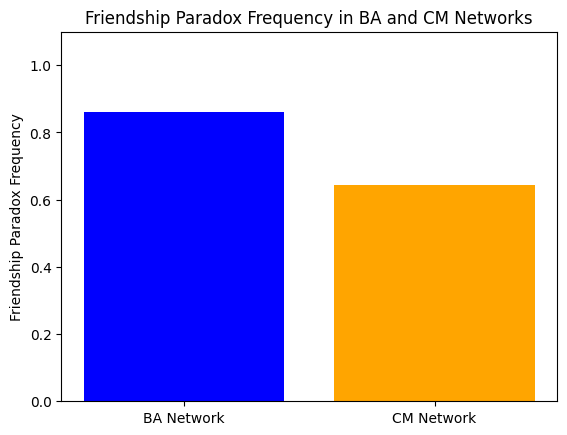

In [8]:
plt.bar(['BA Network', 'CM Network'], [mean_fba, mean_fcm], color=['blue', 'orange'])
plt.ylabel('Friendship Paradox Frequency')
plt.title('Friendship Paradox Frequency in BA and CM Networks')
plt.ylim([0, 1.1])
plt.show()

### *Growth without preferential attachment*

Finally, we'll build a network of same size and degree as in the exercise above, *using the growth mechanism without the preferential attachment*. Follow the steps below for success
> 
>  1. Grow a new network (the Sune-network) with the same parameters as the **F-BA** network in the exercise above, i.e. 5000 nodes, each new node connects to the existing network, but with one key difference: *have the incoming nodes connect to the existing nodes with* **equal probability**. This is the Sune-network.
>  2. Generate an ER network of same number of nodes and links as the Sune-network. 
> * What are the differences between the ER network and the Sune-network? Explain in your own words. 
>   * *Hints*: To get started, plot the two degree distribution in the same plot. Compare and contrast. Another revealing network property to study is the the number of connected components.

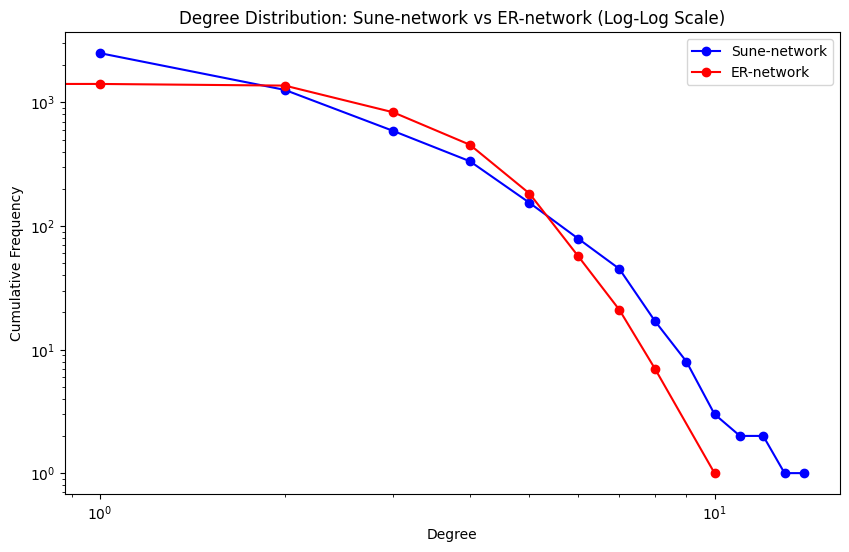

Number of connected components in Sune-network: 1
Number of connected components in ER-network: 806


In [9]:
# Generate the Sune-network
def grow_sune_network(num_nodes):
    G = nx.Graph()
    
    # Start with a single edge between two nodes
    G.add_edge(0, 1)

    # Add nodes one by one
    for new_node in range(2, num_nodes):
        existing_nodes = list(G.nodes)
        # Connect the new node to a random existing node (equal probability)
        connected_node = random.choice(existing_nodes)
        G.add_edge(new_node, connected_node)
    
    return G

# Generate the Sune-network with 5000 nodes
sune_network = grow_sune_network(5000)

# Generate an ER network with the same number of nodes and edges as the Sune-network
num_edges_sune = sune_network.number_of_edges()

# Calculate the edge probability for the ER graph based on the number of edges
num_nodes = 5000
p = 2 * num_edges_sune / (num_nodes * (num_nodes - 1))

# Generate the ER network
er_network = nx.erdos_renyi_graph(num_nodes, p)

# Plot and compare the degree distributions
def plot_degree_distribution(G, label, color):
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
    degree_count = np.bincount(degree_sequence)
    degrees = np.nonzero(degree_count)[0]
    plt.plot(degrees, degree_count[degrees], 'o-', label=label, color=color)

plt.figure(figsize=(10, 6))
plot_degree_distribution(sune_network, 'Sune-network', 'blue')
plot_degree_distribution(er_network, 'ER-network', 'red')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Degree')
plt.ylabel('Cumulative Frequency')
plt.title('Degree Distribution: Sune-network vs ER-network (Log-Log Scale)')
plt.legend()
plt.show()

# Compare the number of connected components
num_components_sune = nx.number_connected_components(sune_network)
num_components_er = nx.number_connected_components(er_network)

print(f"Number of connected components in Sune-network: {num_components_sune}")
print(f"Number of connected components in ER-network: {num_components_er}")

* **Degree Distribution**

    * The Sune-network will have a broader degree distribution, with some nodes having significantly more connections than others but not as extreme as the Barabási-Albert model.

    * The ER-network typically has a more concentrated degree distribution (closer to a Poisson distribution), where most nodes have degrees near the average, and very few nodes deviate significantly from it.

* **Connected Components**

    * The Sune-network is likely to form a single connected component since each new node attaches to an existing one, ensuring connectivity.

    * The ER-network might have more than one connected component if the edge probability is not high enough, but generally, with enough edges, the largest connected component can encompass most nodes.
    
By comparing the degree distribution and the number of connected components, you can better understand how structural properties like randomness and attachment rules impact the overall topology of the network.

# Part 2: Stats of the Country Music Network

This second part requires you to have built the network of Country Musicians as described in the exercises for Week 4. You should complete the following exercise from **Part 2**.

* *Simple network statistics and analysis*

And the following exercise from **Part 3**

* *Let's build a simple visualization of the network*

And that's it! You're all set.

In [61]:
import re
import networkx as nx
import os
import matplotlib.pyplot as plt
import urllib.request

First of all, assuming we do not have the data, first we have to collect it from wikipedia. With our prior knowledge in web scrapping and APIs, we fetch the data from the list of country music performers and save it in a text file. Then we define a regex to retrieve all the links, which in our case are the artists. Finally, we loop from the list of artist formated and retrieve the wikipedia page of the artist and store it in a text file.

### *Gathering data*

In [62]:
# Gathering the data from wikipedia
# set base url
baseurl = "https://en.wikipedia.org/w/api.php?"
info = "titles=List_of_country_music_performers"
action = "action=query"
content = "prop=revisions&rvprop=content"
dataformat ="format=json"

# get the page
url = baseurl + info
query = "{}{}&{}&{}&{}".format(baseurl, action, content, info, dataformat)
print(url)
req = urllib.request.Request(query)
with urllib.request.urlopen(req) as response:
    page = response.read()
    wiki_text = page.decode('utf-8')

if wiki_text is not None:
    print('Page downloaded successfully')

# save the page in a file
with open('wiki_text.txt', 'w') as f:
    f.write(wiki_text)

https://en.wikipedia.org/w/api.php?titles=List_of_country_music_performers
Page downloaded successfully


In [63]:
# regex to get the wiki links from a string
regex_wiki = re.compile(r'\[\[([^\|\]]+)(?:\|[^\]]+)?\]\]')

In [66]:
# use the regex to extract the links
matches = regex_wiki.findall(wiki_text)
print(f"Total links found: {len(matches)}")

# filter remove all matches that contain a colon
filtered = [match for match in matches if ':' not in match]

# filter remove duplicates
filtered_2 = list(set(filtered))
print(f"Without duplicates and images: {len(filtered_2)}")

# remove a speicify value in the set that is not a country music performer
value = 'country music'
if value in filtered_2:
    filtered_2.remove(value)

# encode the values to utf-8 and decode unicode_escape
reencoded = [value.encode('utf-8').decode('unicode_escape') for value in filtered_2]

# change the spaces to underscores
artist = [value.replace(' ', '_') for value in reencoded]
print(f"Final number of artist: {len(artist)}")

Total links found: 2163
Without duplicates and images: 2099
Final number of artist: 2098


In [67]:
# Create artist_data folder in the current directory if it does not exist
if not os.path.exists('artist_data'):
    os.makedirs('artist_data')

# set base url for wikipedia API and the different parameters
baseurl = "https://en.wikipedia.org/w/api.php?"
action = "action=query"
content = "prop=revisions&rvprop=content"
dataformat ="format=json"

for a in artist:
    # for each artist fetch its wikipedia page
    t = f"titles={urllib.parse.quote(a)}"
    query = "{}{}&{}&{}&{}".format(baseurl, action, content, t, dataformat)

    wikiresponse = urllib.request.urlopen(query)
    wikidata = wikiresponse.read()
    wikitext = wikidata.decode('utf-8')

    # format the file name
    if '/' in a:
        a = a.replace('/', '_')

    if '"' in a:
        a = a.replace('"', '')

    # save the page in a file in artist_data folder as a txt file
    with open('artist_data/{}.txt'.format(a), 'w') as f:
        f.write(wikitext)

### *Creating the network*

Once the data has been gathered and stored in files, we create the network. To accomplish that we have created a class NetworkBuilder, that stores the overall graph, the path to the directory from where the data is fetched, the largest component subgraph. This allows us to get the different statistics and easy the visualisation of the graph. From now on all the examples and plots are computed for the largest components subgraph.

In [73]:
class NetworkBuilder():
    def __init__(self, path) -> None:
        self.graph = nx.DiGraph()
        self.path = path
        self.largest_c_subgraph = nx.DiGraph()

    def _build(self):
        # retrive all the files of the given directory, assuming they are .txt
        files = self._get_files()

        # for each filename remove the .txt
        nodes = [file.replace('.txt', '') for file in files]

        self.graph.add_nodes_from(nodes)

        for file in files:
            node = file.replace('.txt', '')

            with open('../lab4/artist_data/{}'.format(file)) as f:
                data = f.read()

            len_content = self._count_words(data)

            # save in the node the number of words
            self.graph.nodes[node]['len_content'] = len_content

            links = self._get_links(data)

            for link in links:
                if link in nodes:
                    self.graph.add_edge(node, link)

        # keep only largest components
        largest_scc = max(nx.weakly_connected_components(self.graph), key=len)

        # Create a subgraph containing only this component
        self.largest_c_subgraph = self.graph.subgraph(largest_scc).copy()


    # get all the files of a given directory
    def _get_files(self):
        return os.listdir(self.path)

    # method to get the artists related to a given artist
    def _get_links(self, data: str):
        artists_raw = regex_wiki.findall(data)

        # remove links that contains semi-colon
        filtered = [a for a in artists_raw if ':' not in a]

        # remove duplicates
        no_duplicates = list(set(filtered))

        if 'country music' in no_duplicates:
            no_duplicates.remove('country music')

        reencoded = [value.encode('utf-8').decode('unicode_escape') for value in no_duplicates]

        # this transformations are due of how the files names are encoded when the data was scrapped
        artists = [value.replace(' ', '_') for value in reencoded]
        artists = [value.replace('/', '_') for value in artists]
        artists = [value.replace('"', '') for value in artists]

        return artists

    # method to count the words in a given string
    def _count_words(self, text: str):
        # Use regex to match words, which are sequences of alphanumeric characters
        words = re.findall(r'\b\w+\b', text)
        return len(words)

    # Degree Distribution
    def plot_degree_distributions(self, g):
        in_degrees = [g.in_degree(n) for n in g.nodes()]
        out_degrees = [g.out_degree(n) for n in g.nodes()]

        plt.figure(figsize=(12, 5))

        # Plot In-Degree Distribution
        plt.subplot(1, 2, 1)
        plt.hist(in_degrees, bins=20, color='blue', alpha=0.7)
        plt.title("In-Degree Distribution")
        plt.xlabel("In-Degree")
        plt.ylabel("Frequency")

        # Plot Out-Degree Distribution
        plt.subplot(1, 2, 2)
        plt.hist(out_degrees, bins=20, color='blue', alpha=0.7)
        plt.title("Out-Degree Distribution")
        plt.xlabel("Out-Degree")
        plt.ylabel("Frequency")

        plt.tight_layout()
        plt.show()


### *Simple network statistics and analysis*

In [74]:
# create the network
nb = NetworkBuilder('./artist_data')
nb._build()

print(f"Number of nodes {nb.graph.number_of_nodes()}")
print(f"Number of edges {nb.graph.number_of_edges()}")

print(f"Number of nodes largest components {nb.largest_c_subgraph.number_of_nodes()}")
print(f"Number of edges largest components {nb.largest_c_subgraph.number_of_edges()}")


Number of nodes 2098
Number of edges 17691
Number of nodes largest components 1945
Number of edges largest components 17684


As it can be seen overall we have 1945 nodes and 17684 edges in the largest components graph. Computing the largest weakly connected component means finding the biggest group of nodes that would form a single connected piece if we treated the graph as undirected. This approach is helpful for gaining insights into the most connected portion of the network, especially in directed graphs where the directionality might obscure the overall structure of connections. Also, we ease slightly the computation cost.

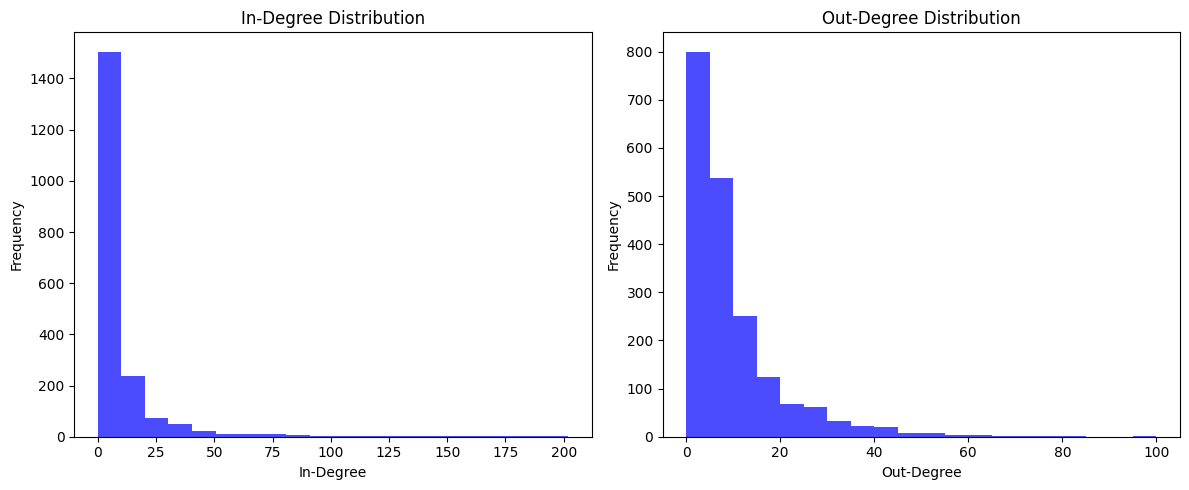

In [75]:
nb.plot_degree_distributions(nb.largest_c_subgraph)

Both distributions are right-skewed, where a few nodes (hubs) are highly connected, while most nodes have fewer connections. This is a common real-world scenario. It can be observed that the in-degree distribution has more extreme values (over 200) compared to the out-degree (up to 100). This suggests that there are a few nodes receiving a large number of connections, but far fewer nodes with a very large number of outgoing connections, this could be due to how the graph is created, since given a node we create out-edges based on the existance of the other artist in that page. Additionally, the in-degree distribution shows a more pronounced skewness, where a large number of nodes have low in-degree, and only a small number of nodes have very high in-degree.

In [76]:
def compare_out_degree_to_random(G):
    N = G.number_of_nodes()
    E = G.number_of_edges()

    # Generate random network with the same number of nodes and edges
    random_graph = nx.gnm_random_graph(N, E, directed=True)
    random_out_degrees = [random_graph.out_degree(n) for n in random_graph.nodes()]
    
    original_out_degrees = [G.out_degree(n) for n in G.nodes()]

    plt.hist(original_out_degrees, bins=20, alpha=0.7, color='blue', label="Original Network")
    plt.hist(random_out_degrees, bins=20, alpha=0.7, color='lightblue', label="Random Network")
    plt.title("Out-Degree Distribution Comparison")
    plt.xlabel("Out-Degree")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

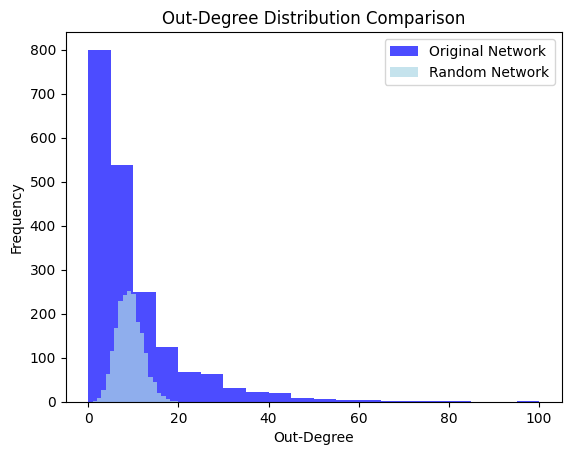

In [77]:
compare_out_degree_to_random(nb.largest_c_subgraph)

If we compare the out-degree distribution to a random network with the same number of nodes and links it can be observed that as previously mentioned the out-degree distribution is right-skewed, while the random network follows a gaussian distribution.

In [78]:
def compare_in_degree_to_scalefree(G):
    N = G.number_of_nodes()

    # Generate scale-free network
    scale_free_graph = nx.barabasi_albert_graph(N, 1)  # 'm' is the number of edges to attach from a new node to existing ones
    scale_free_graph = scale_free_graph.to_directed()  # Convert to directed graph

    scale_free_in_degrees = [scale_free_graph.in_degree(n) for n in scale_free_graph.nodes()]
    original_in_degrees = [G.in_degree(n) for n in G.nodes()]

    plt.hist(original_in_degrees, bins=20, alpha=0.7, color='blue', label="Original Network")
    plt.hist(scale_free_in_degrees, bins=20, alpha=0.7, color='lightblue', label="Scale-Free Network")
    plt.title("In-Degree Distribution Comparison")
    plt.xlabel("In-Degree")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

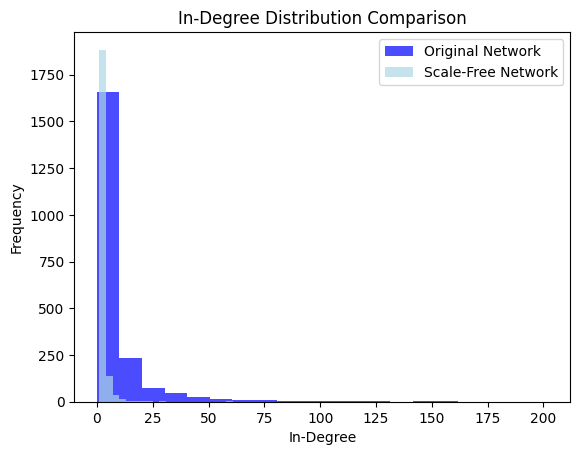

In [79]:
compare_in_degree_to_scalefree(nb.graph)

If we compare the in-degree distribution to a scale-free network with the same number of nodes it can be observed that both follow a right-skewed distribution. In this case the scale-free network shows a more pronounced skewness, where a large number of nodes have low in-degree, while the in-degree distribution has more extreme values (over 200) compared to the scale-free network (around 55).

In [83]:
in_degrees = sorted(nb.largest_c_subgraph.in_degree(), key=lambda x: x[1], reverse=True)[:5]
out_degrees = sorted(nb.largest_c_subgraph.out_degree(), key=lambda x: x[1], reverse=True)[:5]

print("Top 5 Performers by In-Degree:")
for performer, in_deg in in_degrees:
    print(f"{performer}: {in_deg}")

print("\nTop 5 Performers by Out-Degree:")
for performer, out_deg in out_degrees:
    print(f"{performer}: {out_deg}")

Top 5 Performers by In-Degree:
Willie_Nelson: 202
Johnny_Cash: 184
Elvis_Presley: 177
Dolly_Parton: 162
George_Jones: 156

Top 5 Performers by Out-Degree:
Hillary_Lindsey: 100
Pam_Tillis: 82
Randy_Travis: 75
Vince_Gill: 71
Patty_Loveless: 68


The artist with higher in-degree is Willie Nelson and the artist with higher out-degree is Hillary Lindsey. 



In [81]:
pages_with_content = [(n, nb.largest_c_subgraph.nodes[n]['len_content']) for n in nb.largest_c_subgraph.nodes() if 'len_content' in nb.largest_c_subgraph.nodes[n]]
top_10_longest = sorted(pages_with_content, key=lambda x: x[1], reverse=True)[:10]

print("Top 10 Pages with Longest Wiki Entries:")
for page, length in top_10_longest:
    print(f"{page}: {length} words")

Top 10 Pages with Longest Wiki Entries:
Beyoncé: 64599 words
Taylor_Swift: 56927 words
Miley_Cyrus: 51832 words
Justin_Bieber: 51252 words
Carrie_Underwood: 46003 words
Justin_Timberlake: 45283 words
Demi_Lovato: 44703 words
Bob_Dylan: 41834 words
Ed_Sheeran: 36912 words
Elvis_Presley: 34593 words


The 10 pages with the longest wiki pages, from largest to smallest are: Beyoncé, Taylor Swift, Miley Cyrus, Justin Bieber, Carrie Underwood, Justin Timberlake, Demi Lovato, Bob Dylan, Ed Sheeran and Elvis Presley.

### *Let's build a simple visualization of the network*

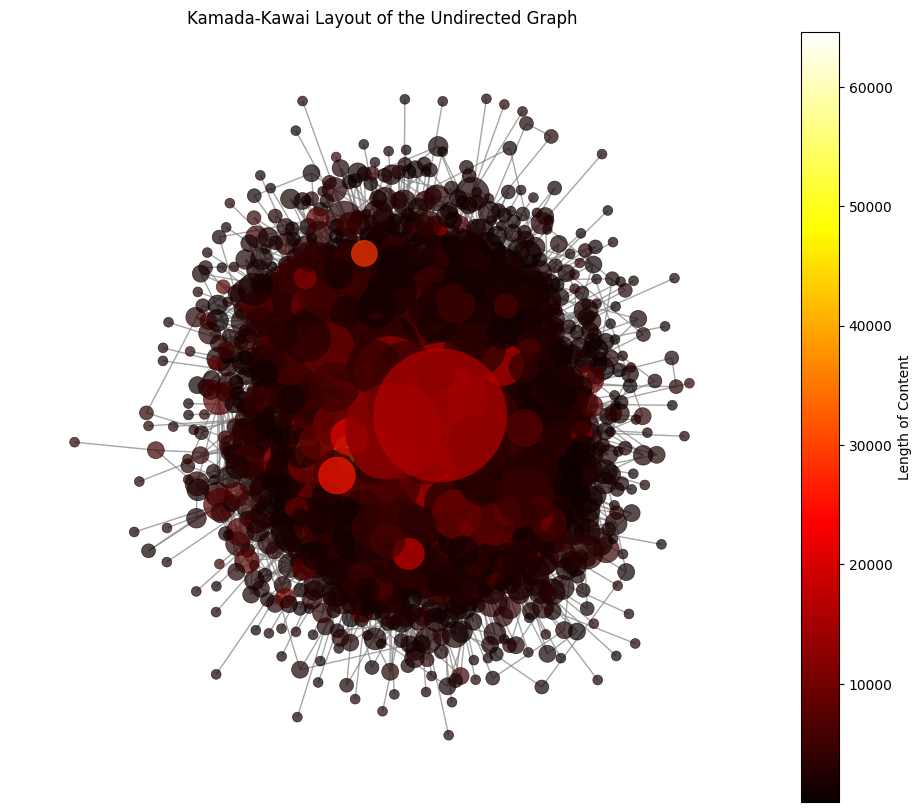

In [82]:
# define the undirected graph
undir_g = nb.largest_c_subgraph.to_undirected()

# plot the network
degrees = dict(undir_g.degree())

# Normalize node sizes based on degree (you can tweak scaling factor if necessary)
node_sizes = [degrees[node] * 50 for node in undir_g.nodes()]

# Get 'length_of_content' attribute for each node, if it exists
content_lengths = [nb.largest_c_subgraph.nodes[node].get('len_content', 0) for node in undir_g.nodes()]

# Normalize content lengths for color mapping
norm = plt.Normalize(vmin=min(content_lengths), vmax=max(content_lengths))
cmap = plt.get_cmap('hot')  # Choosing a simple sequential colormap

# Draw the network using Kamada-Kawai layout
pos = nx.kamada_kawai_layout(undir_g)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 10))

# Create the scalar mappable (for the color bar)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array(content_lengths)

# Draw the graph with customized node sizes and colors
nx.draw(
    undir_g, 
    pos, 
    ax=ax,
    with_labels=False,  # Remove labels for clarity
    node_size=node_sizes,  # Size of nodes based on degree
    node_color=content_lengths,  # Color based on 'length_of_content' attribute
    cmap=cmap,  # Colormap for node colors
    edge_color='gray',  # Color of edges
    alpha=0.7,  # Transparency of edges
    linewidths=0.5  # Width of edges
)

# Add the color bar to the specific axis
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Length of Content', color='black')  # Color of the color bar label

# Style adjustments
plt.title("Kamada-Kawai Layout of the Undirected Graph", color='black')
ax.tick_params(colors='black')  # White tick labels
plt.show()


The plot above shows the network converted to undirected graph, where the size of the node depends on the node degree, the bigger the higher its degree, and the color depends on the length of the content, being the black one the shortest wiki pages while as the number of words increase it leans to yellow colors.